# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
dataset = pd.read_csv('preprocessed_data_all.csv')
dataset.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,ax,ay,az,...,vy0,vz0,x,x0,y,z0,pfx_x,pfx_z,nasty,pitch_type
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,7.665,34.685,-11.960,...,-136.065,-3.995,101.140000,2.280,158.780000,5.302,4.16,10.93,55.0,FF
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,12.043,34.225,-10.085,...,-135.690,-5.980,124.280000,2.119,175.410000,5.307,6.57,12.00,31.0,FF
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,14.368,35.276,-11.560,...,-137.668,-3.337,136.740000,2.127,150.110000,5.313,7.61,10.88,49.0,FF
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,2.104,28.354,-20.540,...,-133.005,-6.567,109.685636,2.279,187.463482,5.210,1.17,6.45,41.0,FF
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,-10.280,21.774,-34.111,...,-110.409,0.325,146.527525,2.179,177.242829,5.557,-8.43,-1.65,18.0,CU


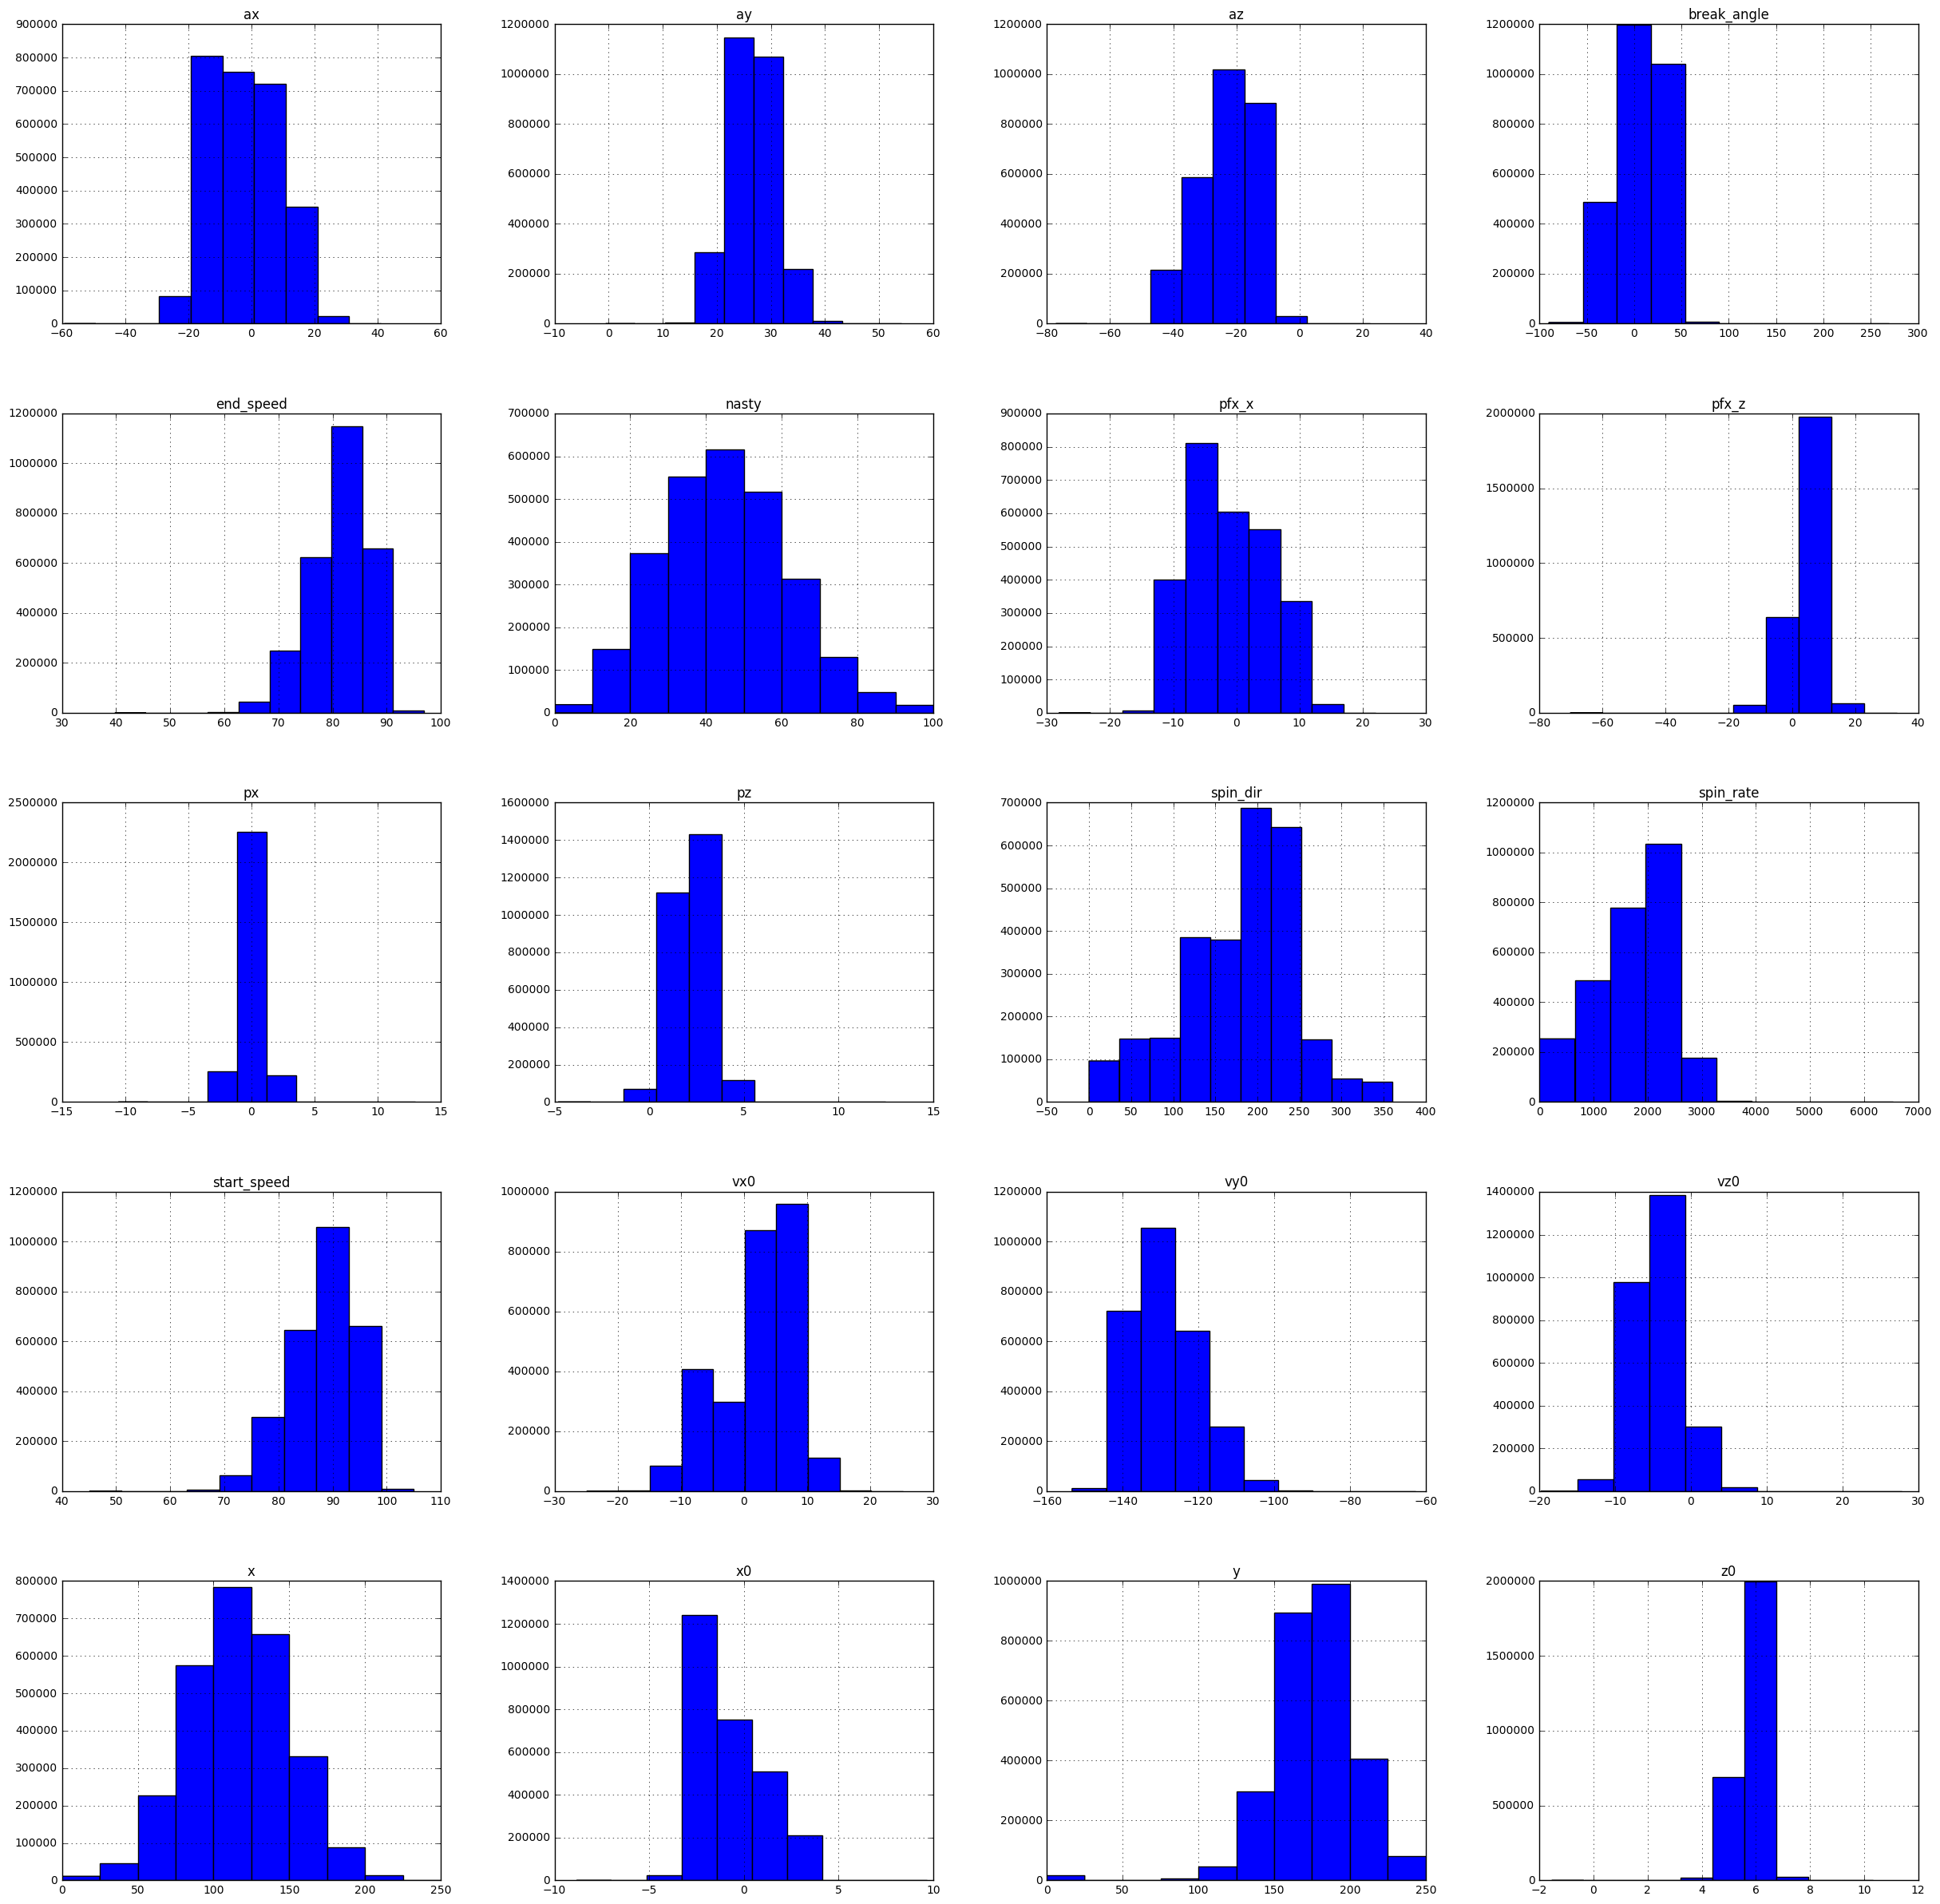

In [3]:
#Visualize by histogram
dataset.hist(figsize= (30,30))
plt.show()

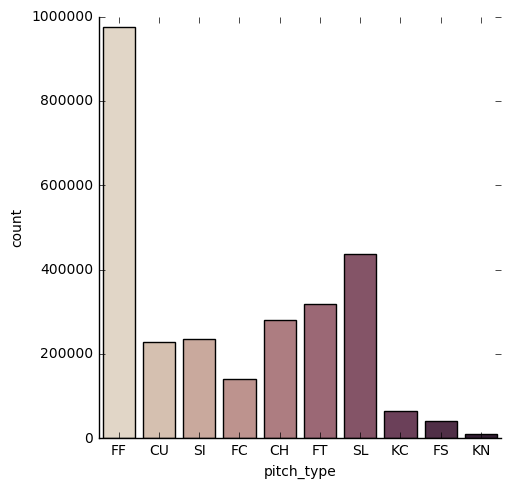

In [4]:
#Visualize pitch type
import seaborn as sns
sns.catplot(x="pitch_type", kind="count", palette="ch:.25", data=dataset);
plt.show()

In [14]:
# Import ependent Variable
X = dataset.iloc[:, 0:19].values

In [8]:
# Import Dependent Variable
#y = dataset.iloc[0:100000, 29].values
y = dataset.iloc[0:, 20].values

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#convert y into binary format
import keras
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [9]:

keys = labelencoder_y.classes_
values = labelencoder_y.transform(labelencoder_y.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'KN': 7, 'CH': 0, 'SL': 9, 'FS': 4, 'FC': 2, 'KC': 6, 'FF': 3, 'SI': 8, 'FT': 5, 'CU': 1}


# Split data into trainning set and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.2)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Importing the Keras libraries and packages
#import keras
import tensorflow as tf
from keras import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation


In [18]:
#Initilize ANN
classifier = Sequential()

#Add input layer and fitst hidden layer
classifier.add(Dense(50, activation='relu', kernel_initializer='uniform', input_dim = 19))


#Add second hidden layer
classifier.add(Dense(50, activation='relu', kernel_initializer='uniform'))

#Add oupt layer
#classifier.add(Dense(10, activation = tf.nn.softmax, kernel_initializer='uniform'))
classifier.add(Dense(10, activation = tf.nn.softmax, kernel_initializer='uniform'))

#compiling ANN
#classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [metrics.categorical_accuracy])

sgd = keras.optimizers.SGD(0.005, momentum=0.0, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

# Fitting the ANN to the Training set
model = classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 25, validation_split=0.1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1971828 samples, validate on 219092 samples
Epoch 1/25
1971828/1971828 [==============================] - 247s 125us/step - loss: 0.7004 - categorical_accuracy: 0.7267 - val_loss: 0.6372 - val_categorical_accuracy: 0.7457
Epoch 2/25
1971828/1971828 [==============================] - 241s 122us/step - loss: 0.6233 - categorical_accuracy: 0.7521 - val_loss: 0.6087 - val_categorical_accuracy: 0.7576
Epoch 3/25
1971828/1971828 [==============================] - 243s 123us/step - loss: 0.6098 - categorical_accuracy: 0.7575 - val_loss: 0.6021 - val_categorical_accuracy: 0.7606
Epoch 4/25
1971828/1971828 [==============================] - 226s 115us/step - loss: 0.6020 - categorical_accuracy: 0.7605 - val_loss: 0.5977 - val_categorical_accuracy: 0.7615
Epoch 5/25
1971828/1971828 [==============================] - 296s 150us/step - loss: 0.5963 - categorical_accuracy: 0.7627 - val_loss: 0.5915 - val_categorical_accuracy: 0.7638
Epoch 6/25
1971828/1971828 [=============================

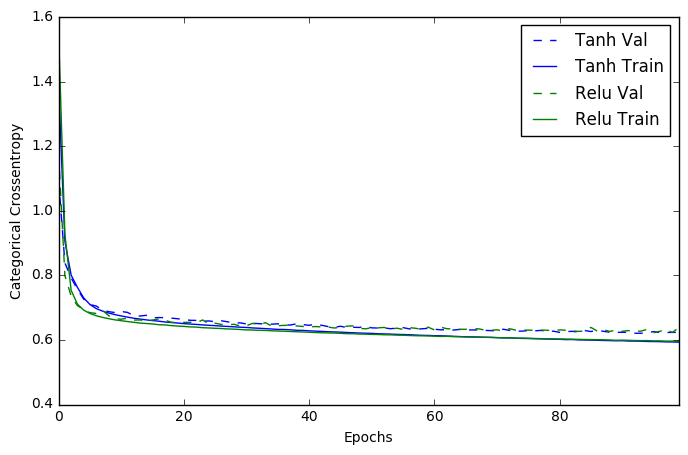

In [26]:
def plot_history(histories, key='categorical_crossentropy'):
  plt.figure(figsize=(8,5))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_loss'],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('tanh', model),
              ('relu', model_small)])

plt.show()

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.45)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.savetxt("cm.csv", cm, delimiter=",")

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.45)


from sklearn.metrics import classification_report
target_names = ['CH', 'CU', 'FC', 'FF', 'FS', 'FT', 'KC', 'KN', 'SI', 'SL']

#{'KN': 8, 'CH': 0, 'FF': 4, 'FC': 3, 'FS': 5, 'FA': 2, 'CU': 1, 'SI': 9, 'FT': 6, 'KC': 7, 'SL': 10}


class_report = classification_report(y_test, y_pred, target_names=target_names)
#class_report = classification_report(y_test, y_pred)

print (class_report)

              precision    recall  f1-score   support

          CH       0.80      0.88      0.84     56033
          CU       0.75      0.83      0.79     45641
          FC       0.67      0.42      0.52     28028
          FF       0.89      0.90      0.90    195425
          FS       0.61      0.21      0.31      8470
          FT       0.66      0.56      0.60     63788
          KC       0.68      0.28      0.40     13091
          KN       0.91      0.88      0.89      2148
          SI       0.60      0.54      0.57     47135
          SL       0.76      0.88      0.82     87971

   micro avg       0.79      0.77      0.78    547730
   macro avg       0.73      0.64      0.66    547730
weighted avg       0.78      0.77      0.77    547730
 samples avg       0.76      0.77      0.76    547730



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


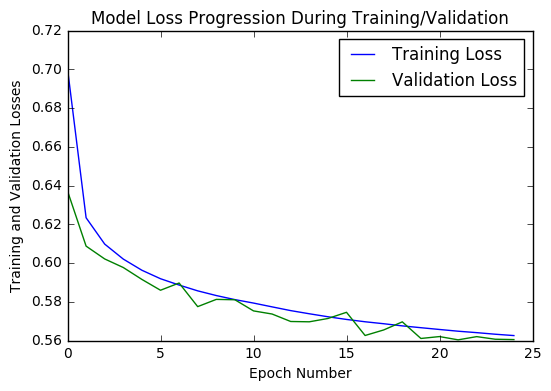

In [22]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

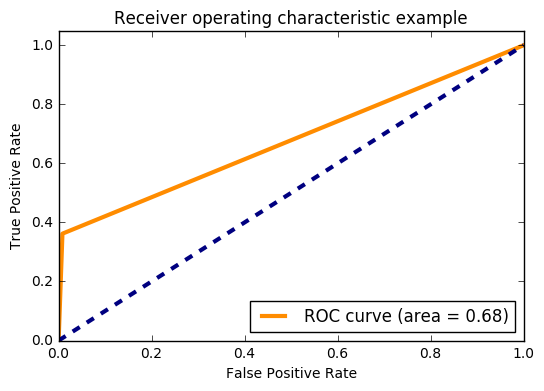

In [24]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute macro-average ROC curve and ROC area
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 3
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



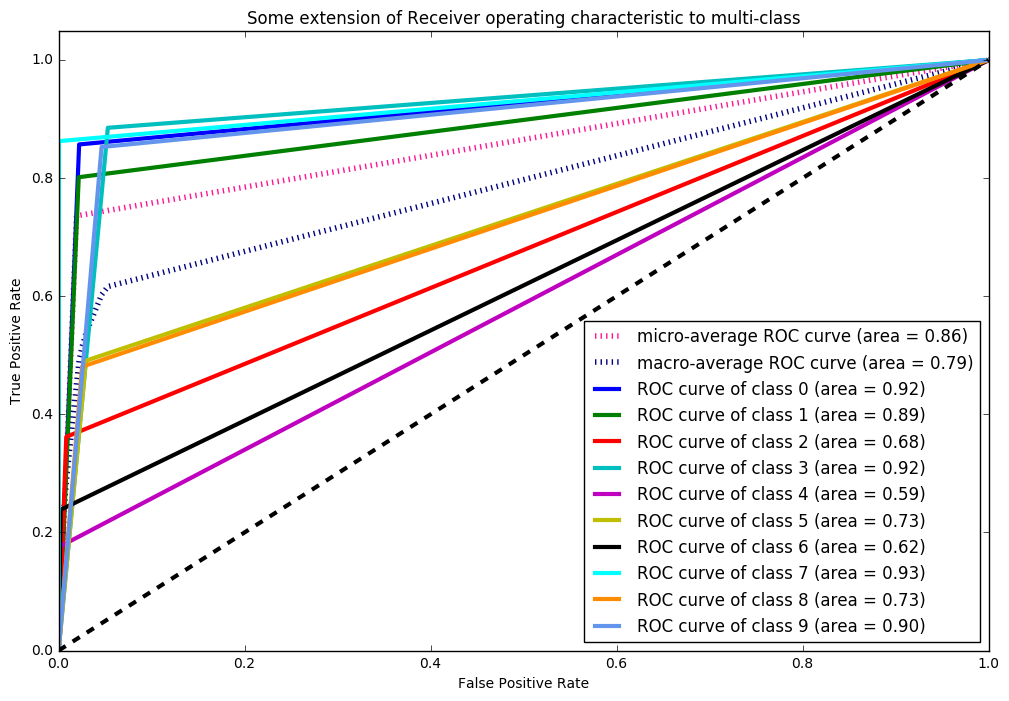

In [27]:
# Compute macro-average ROC curve and ROC area
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Compute micro-average ROC curve and ROC area
thresholds = dict()
fpr["micro"], tpr["micro"], thresholds["micro"] = metrics.roc_curve(y_test.ravel(), y_pred.ravel(),pos_label=2)
print(fpr)
print(tpr)
print(thresholds)